In [3]:
import pandas as pd
import numpy as np
import scipy.stats as stats
#pip install pandas openpyxl
import sys
import matplotlib.pylab as plt
import seaborn as sns

from matplotlib.offsetbox import OffsetImage, AnnotationBbox
from matplotlib.offsetbox import OffsetImage, AnnotationBbox
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
#%matplotlib 

In [4]:
data = pd.read_excel('/Users/chenjin/Library/CloudStorage/OneDrive-UniversityofPittsburgh/2023Fall/IV/mid/R.xlsx',sheet_name='Sheet1', engine='openpyxl')

In [5]:
data

,Year,Format,Value
0,1973,8 - Track,3223.159797
1,1974,8 - Track,3260.164828
2,1975,8 - Track,3171.335781
3,1976,8 - Track,3488.200721
4,1977,8 - Track,3916.554538
...,...,...,...
484,2018,Vinyl Single,6.667128
485,2019,Vinyl Single,7.702052
486,2020,Vinyl Single,7.143305
487,2021,Vinyl Single,8.530848


In [6]:
misslist=pd.Series(data.isna().sum().sort_values(ascending=False),name='missing')
misslist

Year      0
Format    0
Value     0
Name: missing, dtype: int64

In [7]:
misslist1 = pd.Series((data == "NaN").sum().sort_values(ascending=False), name='missing')
misslist1

Year      0
Format    0
Value     0
Name: missing, dtype: int64

In [8]:
rows_with_nan = data[data.isna().any(axis=1)]
rows_with_nandata = data[data != "NaN"].dropna(how='any')
rows_with_nandata

,Year,Format,Value
0,1973,8 - Track,3223.159797
1,1974,8 - Track,3260.164828
2,1975,8 - Track,3171.335781
3,1976,8 - Track,3488.200721
4,1977,8 - Track,3916.554538
...,...,...,...
484,2018,Vinyl Single,6.667128
485,2019,Vinyl Single,7.702052
486,2020,Vinyl Single,7.143305
487,2021,Vinyl Single,8.530848


In [9]:
m = data[data != "NaN"].dropna(how='any')

In [10]:
m.shape

(489, 3)

In [11]:
m_adjust = m

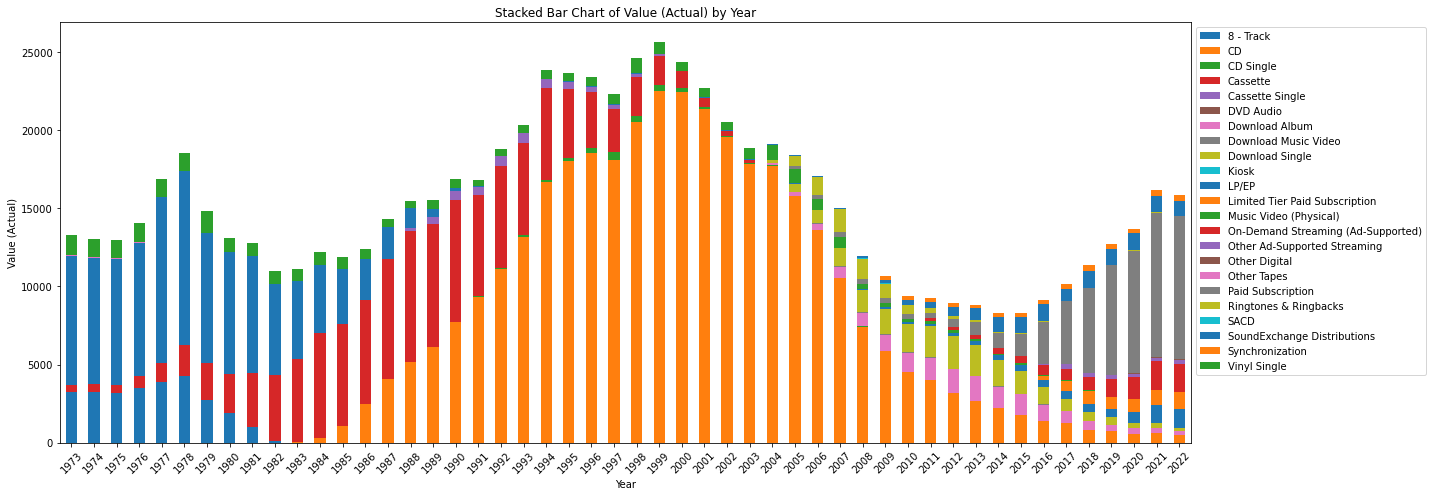

In [12]:
# Pivot the data to format it for a stacked bar chart

pivot_df = m_adjust.pivot(index='Year', columns='Format', values='Value')

# Create the stacked bar chart
ax = pivot_df.plot(kind='bar', stacked=True, figsize=(20, 7))

# Set titles and labels
plt.title('Stacked Bar Chart of Value (Actual) by Year')
plt.xlabel('Year')
plt.ylabel('Value (Actual)')

# Rotate the x-axis tick labels for better readability
plt.xticks(rotation=45)

# Move the legend outside of the chart
ax.legend(loc='upper left', bbox_to_anchor=(1, 1))

# Adjust layout to make room for the legend
plt.tight_layout()

plt.show()

In [13]:
m_adjust

,Year,Format,Value
0,1973,8 - Track,3223.159797
1,1974,8 - Track,3260.164828
2,1975,8 - Track,3171.335781
3,1976,8 - Track,3488.200721
4,1977,8 - Track,3916.554538
...,...,...,...
484,2018,Vinyl Single,6.667128
485,2019,Vinyl Single,7.702052
486,2020,Vinyl Single,7.143305
487,2021,Vinyl Single,8.530848


In [14]:
mapping_principle = {
    'CD': 'Compact Disc',
    'CD Single': 'Compact Disc',
    'Cassette': 'Cassette',
    'Cassette Single': 'Cassette',
    'LP/EP': 'Vinyl Single',
    'Vinyl Single': 'Vinyl Single',
    '8 - Track': '8 - Track',
    'Other Tapes': 'Cassette',
    'Music Video (Physical)': 'Compact Disc',
    'DVD Audio': 'Compact Disc',
    'SACD': 'Compact Disc',
    'Download Single': 'MP3',
    'Download Album': 'MP3',
    'Kiosk': 'Compact Disc',
    'Download Music Video': 'MP3',
    'Ringtones & Ringbacks': 'Ringtone',
    'Paid Subscriptions': 'Streaming',
    'Limited Tier Paid Subscription': 'Streaming',
    'On-Demand Streaming (Ad-Supported)': 'Streaming',
    'Other Ad-Supported Streaming': 'Streaming',
    'Other Digital': 'MP3',
    'Paid Subscription': 'Streaming',
    'SoundExchange Distributions': 'Streaming'
}

# Replace the values in 'Format' column based on the mapping principle
m_adjust_newformat = m_adjust
m_adjust_newformat['Format'] = m_adjust_newformat['Format'].map(mapping_principle).fillna(m_adjust['Format'])

In [15]:
m_adjust_newformat

,Year,Format,Value
0,1973,8 - Track,3223.159797
1,1974,8 - Track,3260.164828
2,1975,8 - Track,3171.335781
3,1976,8 - Track,3488.200721
4,1977,8 - Track,3916.554538
...,...,...,...
484,2018,Vinyl Single,6.667128
485,2019,Vinyl Single,7.702052
486,2020,Vinyl Single,7.143305
487,2021,Vinyl Single,8.530848


In [16]:
m_adjust_newformat[m_adjust_newformat["Year"]==2022]

,Year,Format,Value
49,2022,Compact Disc,482.578147
83,2022,Compact Disc,6.818145
154,2022,Compact Disc,0.073177
173,2022,MP3,241.864662
191,2022,MP3,1.342922
210,2022,MP3,214.141847
228,2022,Compact Disc,0.396102
278,2022,Vinyl Single,1224.385495
285,2022,Streaming,1063.012029
319,2022,Compact Disc,11.329987


In [17]:
# Preparing data for stackplot
x = pivot_result.index
y = [pivot_result[col].values for col in pivot_result.columns]

# Plotting the stacked area chart using stackplot
plt.figure(figsize=(20, 7))
plt.stackplot(x, *y, labels=pivot_result.columns)

plt.title("Stacked Area Chart of Value by Format over Years")
plt.ylabel("Value")
plt.xlabel("Year")
plt.legend(loc="upper left")

plt.tight_layout()
plt.show()

NameError: name 'pivot_result' is not defined

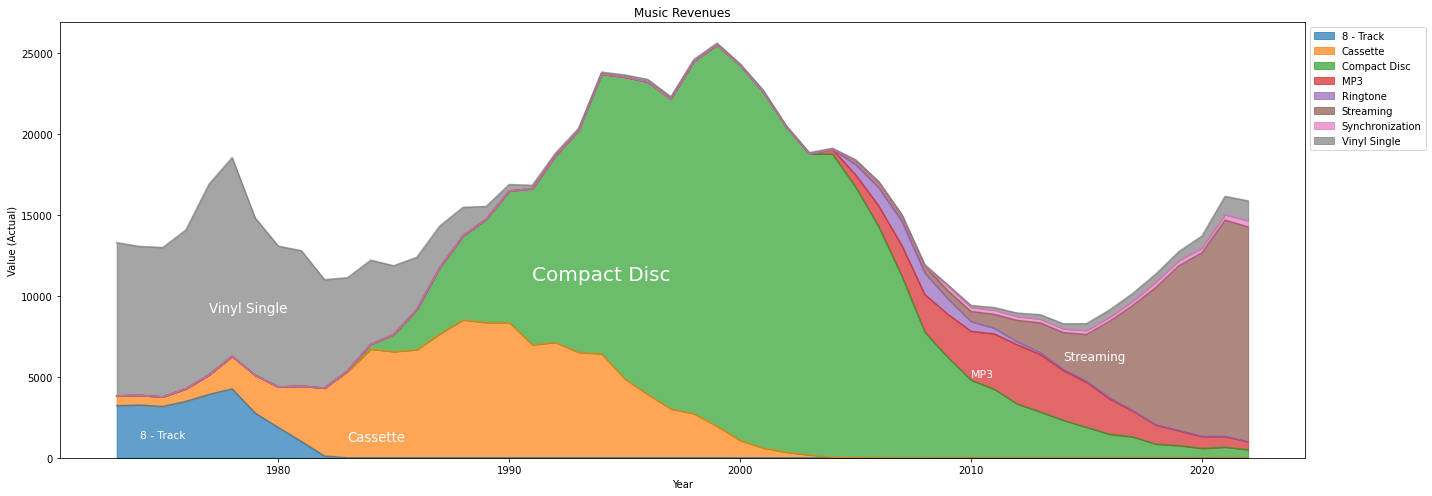

In [18]:
# Pivot the dataset
pivot_area = m_adjust_newformat.pivot_table(index='Year', columns='Format', values='Value', aggfunc='sum')

# Create the stacked area chart
fig, ax = plt.subplots(figsize=(20, 7))
pivot_area.plot(kind='area', stacked=True, alpha=0.7, ax=ax)

# Set titles and labels
ax.set_title('Music Revenues')
ax.set_xlabel('Year')
ax.set_ylabel('Value (Actual)')
ax.legend(loc='upper left', bbox_to_anchor=(1, 1))

# Compute the area of each stack
areas = pivot_area.sum(axis=0)

# Normalize the areas to get values between 10 and 20 for font sizes
min_font_size = 10
max_font_size = 20
normalized_areas = (areas - areas.min()) / (areas.max() - areas.min())
font_sizes = min_font_size + normalized_areas * (max_font_size - min_font_size)

# Adding text to the specified positions
formats = ['8 - Track', 'Compact Disc', 'Cassette', 'MP3', 'Vinyl Single', 'Streaming']
positions = [(1974, 1200), (1991, 11000), (1983, 1000), (2010, 5000), (1977, 9000), (2014, 6000)]

for format_, position in zip(formats, positions):
    ax.text(position[0], position[1], format_, fontsize=font_sizes[format_], color='white')

# Show the chart
plt.tight_layout()
plt.show()

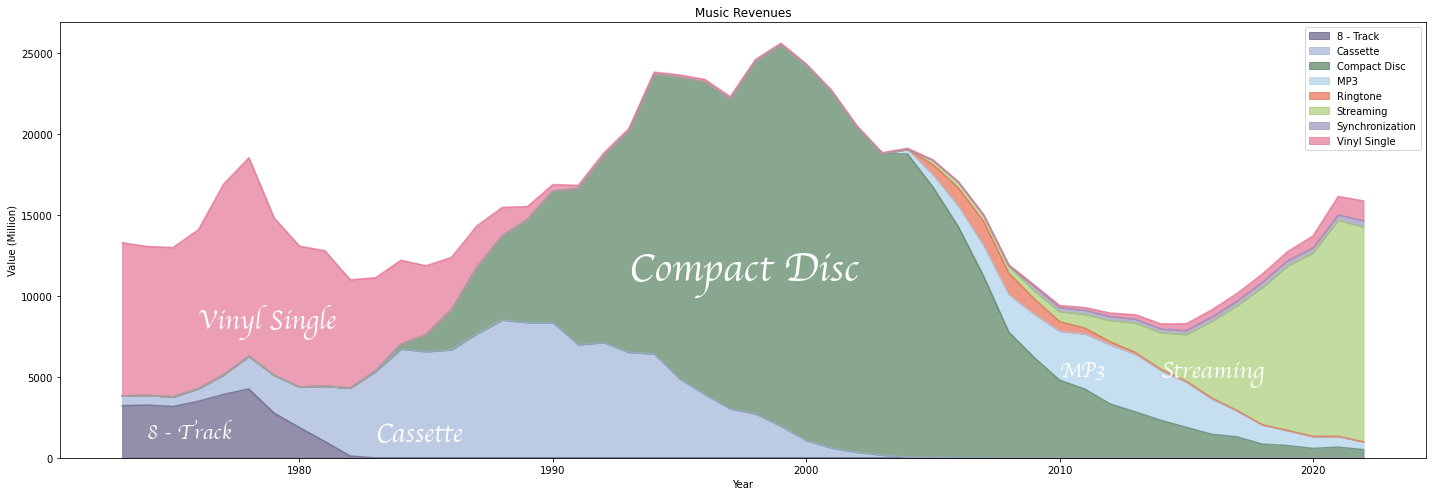

In [19]:
# Pivot the dataset
pivot_area = m_adjust_newformat.pivot_table(index='Year', columns='Format', values='Value', aggfunc='sum')

# Custom colors for the stacks
colors = {
    '8 - Track': '#665e86',
    'Compact Disc': '#56825f',
    'Cassette': '#a1b4d8',
    'MP3': '#aed2eb', # Modified color code
    'Vinyl Single':'#e47594' ,
    'Streaming': '#a9cd75',
    'Ringtone': '#e76e51',
    'Synchronization': '#9894c0'
}

# Create the stacked area chart with the specified colors
fig, ax = plt.subplots(figsize=(20, 7))
pivot_area.plot(kind='area', stacked=True, color=[colors[col] for col in pivot_area.columns], alpha=0.7, ax=ax)

# Set titles and labels
ax.set_title('Music Revenues')
ax.set_xlabel('Year')
ax.set_ylabel('Value (Million)')
ax.legend(loc='upper right')

# Compute the area of each stack
areas = pivot_area.sum(axis=0)

# Normalize the areas to get values between 10 and 20 for font sizes
min_font_size = 20
max_font_size = 40
normalized_areas = (areas - areas.min()) / (areas.max() - areas.min())
font_sizes = min_font_size + normalized_areas * (max_font_size - min_font_size)

# Adding text to the specified positions
formats = ['8 - Track', 'Compact Disc', 'Cassette', 'MP3', 'Vinyl Single', 'Streaming']
positions = [(1974, 1200), (1993, 11000), (1983, 1000), (2010, 5000), (1976, 8000), (2014, 5000)]

for format_, position in zip(formats, positions):
    ax.text(position[0], position[1], format_, fontsize=font_sizes[format_], color='white', family='Apple Chancery')

# Show the chart
plt.tight_layout()
plt.show()


In [20]:
# Preparing data for stackplot
# Assuming m_adjust_newforma is already defined

result = m_adjust_newformat.groupby(['Year', 'Format'])['Value'].sum().reset_index()
pivot_result = result.pivot(index='Year', columns='Format', values='Value').fillna(0)

pivot_result_df = pd.DataFrame(pivot_result).reset_index()


In [21]:
pivot_result_df.max()
columns = pivot_result_df.columns

#print(columns)
#pivot_result_df


# Get the index positions of the start and end columns
start_idx = pivot_result_df.columns.get_loc("8 - Track")
end_idx = pivot_result_df.columns.get_loc("Vinyl Single") + 1

# Add a new column with the sum of specified columns for each row
pivot_result_df['Total'] = pivot_result_df.iloc[:, start_idx:end_idx].sum(axis=1)

pivot_result_df[pivot_result_df['Total'] == pivot_result_df['Total'].max()]
pivot_result_df[pivot_result_df['Compact Disc'] == pivot_result_df['Compact Disc'].max()]
pivot_result_df[pivot_result_df["Vinyl Single"]==pivot_result_df["Vinyl Single"].min()]

Format,Year,8 - Track,Cassette,Compact Disc,MP3,Ringtone,Streaming,Synchronization,Vinyl Single,Total
33,2006,0.0,5.371148,14286.093185,1271.945987,1123.295828,346.947148,0.0,37.16254,17070.815836


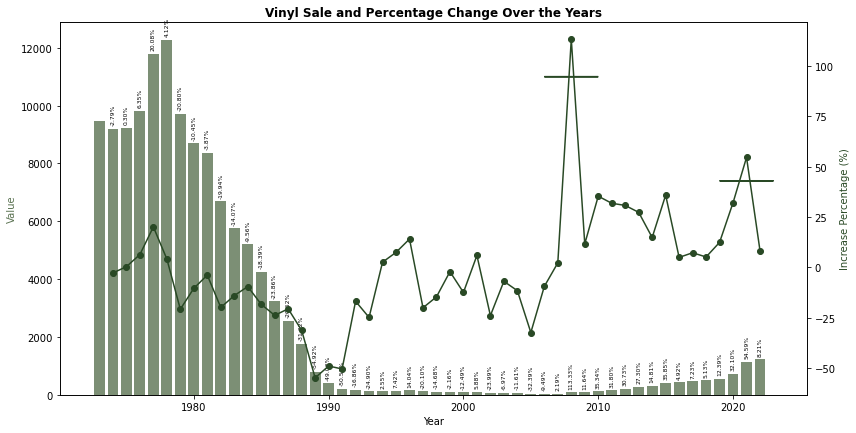

In [22]:


# Extract the required columns
ax.set_ylim(0, 15000)
year_data = pivot_result_df['Year']
vinyl_single_data = pivot_result_df['Vinyl Single']

# Calculate the increase change percentage
increase_percentages = vinyl_single_data.pct_change() * 100

# Create a dual axis chart
fig, ax1 = plt.subplots(figsize=(12, 6))

# Plotting the bar chart on ax1
bars = ax1.bar(year_data, vinyl_single_data, color='#5B7352', label='Vinyl Single Sales', alpha=0.8)
ax1.set_xlabel('Year')
ax1.set_ylabel('Value', color='#5B7352')
ax1.tick_params(axis='y', labelcolor='black')

# Create a second y-axis for the line chart
ax2 = ax1.twinx()
ax2.plot(year_data, increase_percentages, color='#294925', marker='o', label='Increase Percentage')
ax2.set_ylabel('Increase Percentage (%)', color='#294925')
ax2.tick_params(axis='y', labelcolor='black')

# Annotate each bar with the increase percentage
for bar, percentage in zip(bars, increase_percentages):
    height = bar.get_height()
    if not np.isnan(percentage):  # Avoid annotating the first bar
        ax1.text(bar.get_x() + bar.get_width() / 2, height + 0.01 * max(vinyl_single_data),
                 f'{percentage:.2f}%', ha='center', va='bottom', fontsize=6, rotation=90, color='black')

# Add circles
circle_radius = 2  # Adjust the radius as per your requirements
circle1 = plt.Circle((2008, 11000), circle_radius, color='#294925', fill=False, linewidth=1.5)
circle2 = plt.Circle((2021, 7400), circle_radius, color='#294925', fill=False, linewidth=1.5)

ax1.add_patch(circle1)
ax1.add_patch(circle2)


# Display the combined chart
fig.tight_layout()
plt.title('Vinyl Sale and Percentage Change Over the Years',weight='bold',y=1)
plt.show()



In [23]:
vinyl_single_2008 = pivot_result_df.loc[pivot_result_df['Year'] == 2008, 'Vinyl Single'].values
ymax_2008 = vinyl_single_2008[0]/ax1.get_ylim()[1] if vinyl_single_2008.size > 0 else 0

vinyl_single_2021 = pivot_result_df.loc[pivot_result_df['Year'] == 2021, 'Vinyl Single'].values
ymax_2021 = vinyl_single_2021[0]/ax1.get_ylim()[1] if vinyl_single_2021.size > 0 else 0
ymax_2008

0.006288101008527561

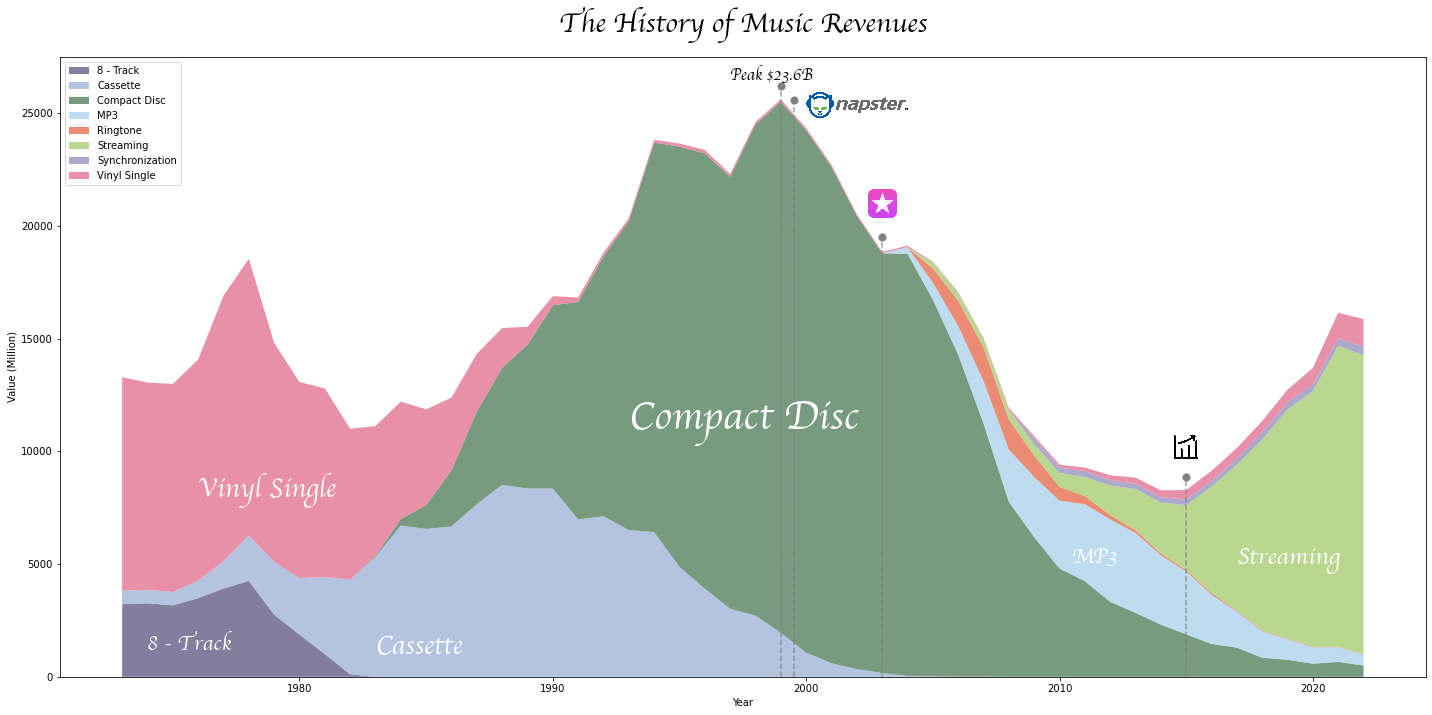

In [42]:


#pivot_result = pd.dataframe(pivot_result)

# Custom colors for the stacks
colors = {
    '8 - Track': '#665e86',
    'Compact Disc': '#56825f',
    'Cassette': '#a1b4d8',
    'MP3': '#aed2eb', # Modified color code
    'Vinyl Single':'#e47594' ,
    'Streaming': '#a9cd75',
    'Ringtone': '#e76e51',
    'Synchronization': '#9894c0'
}

x = pivot_result.index
y = [pivot_result[col].values for col in pivot_result.columns]


# Plotting the stacked area chart using stackplot
fig, ax = plt.subplots(figsize=(20, 10))
ax.stackplot(x, *y, labels=pivot_result.columns, colors=[colors[col] for col in pivot_result.columns], alpha=0.8)

# Set titles and labels
ax.set_title('The History of Music Revenues',size=28, color='black', weight='bold',y=1.03, family='Apple Chancery')
ax.set_xlabel('Year')
ax.set_ylabel('Value (Million)')
ax.legend(loc='upper left')
ax.set_ylim(0, 27500)

# Compute the area of each stack
areas = pivot_result.sum(axis=0)

# Normalize the areas to a suitable font size range (you can adjust as needed)
max_font_size = 40  # Set this to the maximum font size you want
min_font_size = 20  # Set this to the minimum font size you want

scaled_areas = (areas - areas.min()) / (areas.max() - areas.min())
font_sizes = min_font_size + scaled_areas * (max_font_size - min_font_size)

# Plotting your stacks (assuming you've already done this)

# Adding text to the specified positions
formats = ['8 - Track', 'Compact Disc', 'Cassette', 'MP3', 'Vinyl Single', 'Streaming']
positions = [(1974, 1200), (1993, 11000), (1983, 1000), (2010.5, 5000), (1976, 8000), (2017, 5000)]

for format_, position in zip(formats, positions):
    ax.text(position[0], position[1], format_, fontsize=font_sizes[format_], color='white', family='Apple Chancery')
    
# Add vertical dotted line at x = 1999
# Adding a vertical dotted line at x=2009 up to y=25800 and another at x=2015 up to y=8350
ax.axvline(x=1999, ymin=0, ymax=26200/ax.get_ylim()[1], color='gray', linestyle='--', alpha=0.7)
ax.axvline(x=1999.5, ymin=0, ymax=25600/ax.get_ylim()[1], color='gray', linestyle='--', alpha=0.7)
ax.axvline(x=2015, ymin=0, ymax=8850/ax.get_ylim()[1], color='gray', linestyle='--', alpha=0.7)
ax.axvline(x=2003, ymin=0, ymax=19500/ax.get_ylim()[1], color='gray', linestyle='--', alpha=0.7)

# Adding gray dots at the specified positions
ax.scatter(1999, 26200, color='gray', s=50)  # `s` parameter controls the size of the dot
ax.scatter(1999.5, 25600, color='gray', s=50)
ax.scatter(2015, 8850, color='gray', s=50)
ax.scatter(2003, 19500, color='gray', s=50)

# Adding text at the specified position
ax.text(1997, 26500, "Peak $23.6B", fontsize=16, color='black', weight='bold',family='Apple Chancery')


# Load the first image
img1 = mpimg.imread('/Users/chenjin/Library/CloudStorage/OneDrive-UniversityofPittsburgh/2023Fall/IV/mid/nap.png')

# Create the OffsetImage for the first image
imagebox1 = OffsetImage(img1, zoom=0.028)  # Adjust zoom level as required

# Create an AnnotationBbox with our OffsetImage and desired position
ab1 = AnnotationBbox(imagebox1, (2002, 25300), frameon=False)

# Add it to the ax
ax.add_artist(ab1)

# Load the second image
img2 = mpimg.imread('/Users/chenjin/Library/CloudStorage/OneDrive-UniversityofPittsburgh/2023Fall/IV/mid/iTunes.png')
imagebox2 = OffsetImage(img2, zoom=0.1)  # Adjust zoom level as required
ab2 = AnnotationBbox(imagebox2, (2003, 21000), frameon=False)
ax.add_artist(ab2)

# Load the third image
img3 = mpimg.imread('/Users/chenjin/Library/CloudStorage/OneDrive-UniversityofPittsburgh/2023Fall/IV/mid/increase.png')
imagebox3 = OffsetImage(img3, zoom=0.05)  # Adjust zoom level as required
ab3 = AnnotationBbox(imagebox3, (2015, 10200), frameon=False)
ax.add_artist(ab3)

plt.tight_layout()
plt.show()

